# High & Low - profitable

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
### Ignore this year data => tranh over fitting
dataset = dataset[dataset.index < '2024-01-01 00:00:00']

In [4]:
# Chi lay data sau 10h de phan tich
dataset = dataset[100*dataset.index.hour + dataset.index.minute > 955]

In [5]:
data2 = dataset.copy()
day_data = data2.resample("D").agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'first',
    'Close': 'last'
    }).rename(columns={'High': 'Day_High', 'Low': 'Day_Low', 'Open': 'Day_Open', 'Close': 'Day_Close'})
day_data['Y_Day_High'] = day_data['Day_High'].shift(1)
day_data['Y_Day_Low'] = day_data['Day_Low'].shift(1)
day_data['Y_Day_Close'] = day_data['Day_Close'].shift(1)
day_data.dropna(inplace=True)

In [6]:
data = dataset.copy()
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())
data = pd.merge(data, day_data, left_on="time_d", right_index=True, how="left")
data = data.drop(columns=['Volume', 'time_d'])
data.dropna(inplace=True)
data

,Open,High,Low,Close,Day_High,Day_Low,Day_Open,Day_Close,Y_Day_High,Y_Day_Low,Y_Day_Close
Date,,,,,,,,,,,
2018-08-14 10:00:00,955.8,956.0,955.4,955.4,961.8,952.1,955.8,959.3,954.6,942.3,954.2
2018-08-14 10:05:00,955.1,955.8,955.0,955.7,961.8,952.1,955.8,959.3,954.6,942.3,954.2
2018-08-14 10:10:00,955.8,956.5,955.5,956.5,961.8,952.1,955.8,959.3,954.6,942.3,954.2
2018-08-14 10:15:00,956.6,957.3,956.3,957.1,961.8,952.1,955.8,959.3,954.6,942.3,954.2
2018-08-14 10:20:00,957.0,957.2,956.1,956.1,961.8,952.1,955.8,959.3,954.6,942.3,954.2
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:15:00,1133.8,1136.5,1132.4,1132.9,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9
2023-12-29 14:20:00,1132.4,1133.7,1131.5,1133.3,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9
2023-12-29 14:25:00,1133.5,1134.9,1132.2,1133.9,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9


In [7]:
# 0: not_min_max, 1: low area, 2: high area
def apply_group(r):
    group = 0
    if r['Close'] > r['Day_High'] - 3:
        group = 2
    elif r['Close'] < r['Day_Low'] + 3:
        group = 1
    return group
data['group'] = data.apply(lambda r: apply_group(r), axis=1)
data

,Open,High,Low,Close,Day_High,Day_Low,Day_Open,Day_Close,Y_Day_High,Y_Day_Low,Y_Day_Close,group
Date,,,,,,,,,,,,
2018-08-14 10:00:00,955.8,956.0,955.4,955.4,961.8,952.1,955.8,959.3,954.6,942.3,954.2,0
2018-08-14 10:05:00,955.1,955.8,955.0,955.7,961.8,952.1,955.8,959.3,954.6,942.3,954.2,0
2018-08-14 10:10:00,955.8,956.5,955.5,956.5,961.8,952.1,955.8,959.3,954.6,942.3,954.2,0
2018-08-14 10:15:00,956.6,957.3,956.3,957.1,961.8,952.1,955.8,959.3,954.6,942.3,954.2,0
2018-08-14 10:20:00,957.0,957.2,956.1,956.1,961.8,952.1,955.8,959.3,954.6,942.3,954.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:15:00,1133.8,1136.5,1132.4,1132.9,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9,1
2023-12-29 14:20:00,1132.4,1133.7,1131.5,1133.3,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9,1
2023-12-29 14:25:00,1133.5,1134.9,1132.2,1133.9,1139.5,1130.9,1134.0,1134.6,1135.2,1118.4,1132.9,0


In [8]:
### Gia hien tai so voi gia Open ngay hom nay
data['rate_x'] = data.apply(lambda r: 1000 * (r['Close'] - r['Day_Open']) / r['Day_Open'], axis=1)
### Gia hien tai so voi gia Close ngay hom qua
data['rate_y'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_Close']) / r['Y_Day_Close'], axis=1)
### Gia hien tai so voi gia High ngay hom qua
data['rate_z'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_High']) / r['Y_Day_High'], axis=1)
### Gia hien tai so voi gia Low ngay hom qua
data['rate_w'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_Low']) / r['Y_Day_Low'], axis=1)

In [9]:
group_high_data = data[data['group']==2]
group_low_data = data[data['group']==1]
group_none_data = data[data['group']==0]

## rate_x data analytics

In [10]:
data['rate_x'].describe()

count    41372.000000
mean         0.005615
std          7.148252
min        -63.431247
25%         -2.233484
50%         -0.095781
75%          2.157497
max        101.575981
Name: rate_x, dtype: float64

In [11]:
data['rate_x_group'] = pd.cut(data['rate_x'], 35)
s1 = data.groupby(['rate_x_group'])[['group']].count()
f1 = s1[['group']].rename(columns={'group': 'count'})
f1

,count
rate_x_group,
"(-63.596, -58.717]",9
"(-58.717, -54.002]",9
"(-54.002, -49.288]",15
"(-49.288, -44.573]",27
"(-44.573, -39.859]",32
"(-39.859, -35.144]",29
"(-35.144, -30.43]",60
"(-30.43, -25.715]",87
"(-25.715, -21.001]",173


### Rate_y

In [12]:
data['rate_y'].describe()

count    41372.000000
mean         0.694707
std         10.801648
min       -110.069444
25%         -2.802504
50%          0.773163
75%          4.989247
max         69.970845
Name: rate_y, dtype: float64

In [13]:
data['rate_y_group'] = pd.cut(data['rate_y'], 30)
y1 = data.groupby(['rate_y_group'])[['group']].count()
y11 = y1[['group']].rename(columns={'group': 'count'})
y11

,count
rate_y_group,
"(-110.249, -104.068]",8
"(-104.068, -98.067]",5
"(-98.067, -92.065]",11
"(-92.065, -86.064]",4
"(-86.064, -80.063]",11
"(-80.063, -74.061]",0
"(-74.061, -68.06]",21
"(-68.06, -62.059]",19
"(-62.059, -56.057]",36


### Rate_z

In [14]:
data['rate_z'].describe()

count    41372.000000
mean        -6.508479
std         12.845242
min       -112.825033
25%        -10.894006
50%         -4.279662
75%          0.335270
max         69.969040
Name: rate_z, dtype: float64

In [15]:
# Range = from -114 to 70 = 185 => cut to 37 groups
data['rate_z_group'] = pd.cut(data['rate_z'], 37)
z1 = data.groupby(['rate_z_group'])[['group']].count()
z11 = z1[['group']].rename(columns={'group': 'count'})
z11

,count
rate_z_group,
"(-113.008, -107.885]",23
"(-107.885, -102.944]",8
"(-102.944, -98.004]",6
"(-98.004, -93.064]",18
"(-93.064, -88.123]",17
"(-88.123, -83.183]",27
"(-83.183, -78.242]",16
"(-78.242, -73.302]",23
"(-73.302, -68.362]",30


### Rate w

In [16]:
data['rate_w'].describe()

count    41372.000000
mean         7.960045
std         13.388887
min        -66.586293
25%          1.559015
50%          6.392969
75%         13.112048
max        124.523507
Name: rate_w, dtype: float64

In [17]:
# Range = from -66 to 130 = 196 => cut to 40 groups
data['rate_w_group'] = pd.cut(data['rate_w'], 40)
w1 = data.groupby(['rate_w_group'])[['group']].count()
w11 = w1[['group']].rename(columns={'group': 'count'})
w11

,count
rate_w_group,
"(-66.777, -61.809]",28
"(-61.809, -57.031]",13
"(-57.031, -52.253]",35
"(-52.253, -47.475]",33
"(-47.475, -42.698]",61
"(-42.698, -37.92]",68
"(-37.92, -33.142]",97
"(-33.142, -28.364]",163
"(-28.364, -23.587]",140


### Preparing working data

In [18]:
working_data = data[(data['rate_x'] > -46) & (data['rate_x'] < 36.8) & (data['rate_y'] > -56) & (data['rate_y'] < 46) & (data['rate_z'] > -74) & (data['rate_z'] < 30) & (data['rate_w'] > -46.8) & (data['rate_w'] < 66.8)]

In [19]:
working_group_high = working_data[working_data.group==2]
working_group_low = working_data[working_data.group==1]
working_group_none = working_data[working_data.group==0]

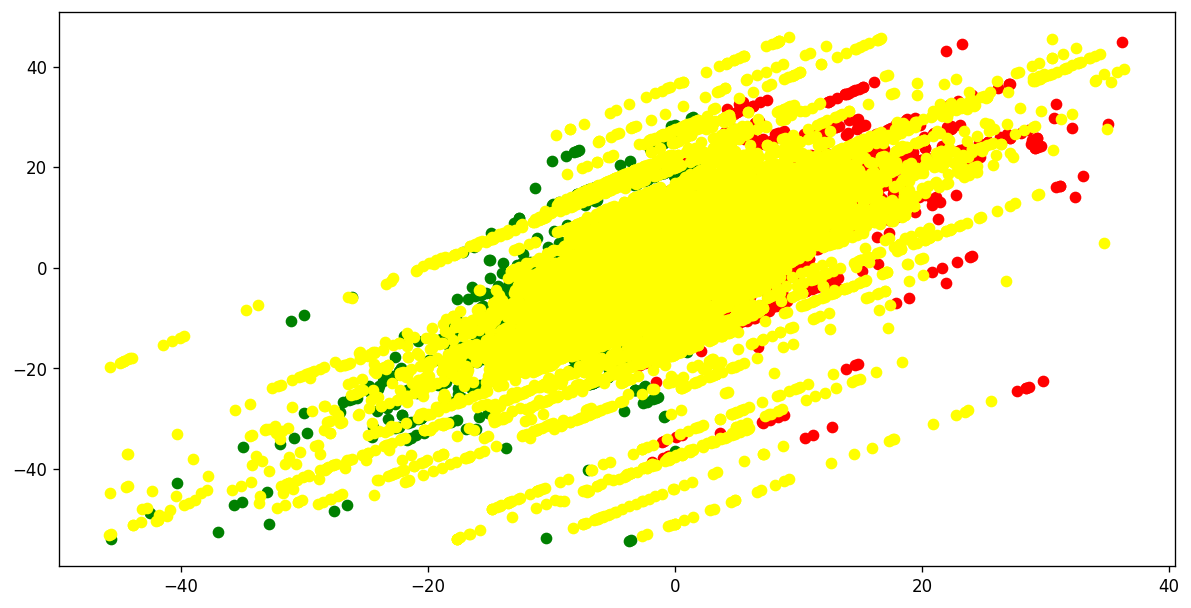

In [20]:
plt.scatter(working_group_high['rate_x'], working_group_high['rate_y'], c='red')
plt.scatter(working_group_low['rate_x'], working_group_low['rate_y'], c='green')
plt.scatter(working_group_none['rate_x'], working_group_none['rate_y'], c='yellow')

In [21]:
# rate_x < 20 & rate_y < -5 => long
# rate_x > -20 & rate_y > 5 => short

In [22]:
# working_group_high.plot.scatter(x='rate_x', y='rate_y', c='red')
# working_group_low.plot.scatter(x='rate_x', y='rate_y', c='green')

In [23]:
#working_rate_x_y.plot.scatter(x='rate_x', y='rate_y', c='group', colormap='viridis')

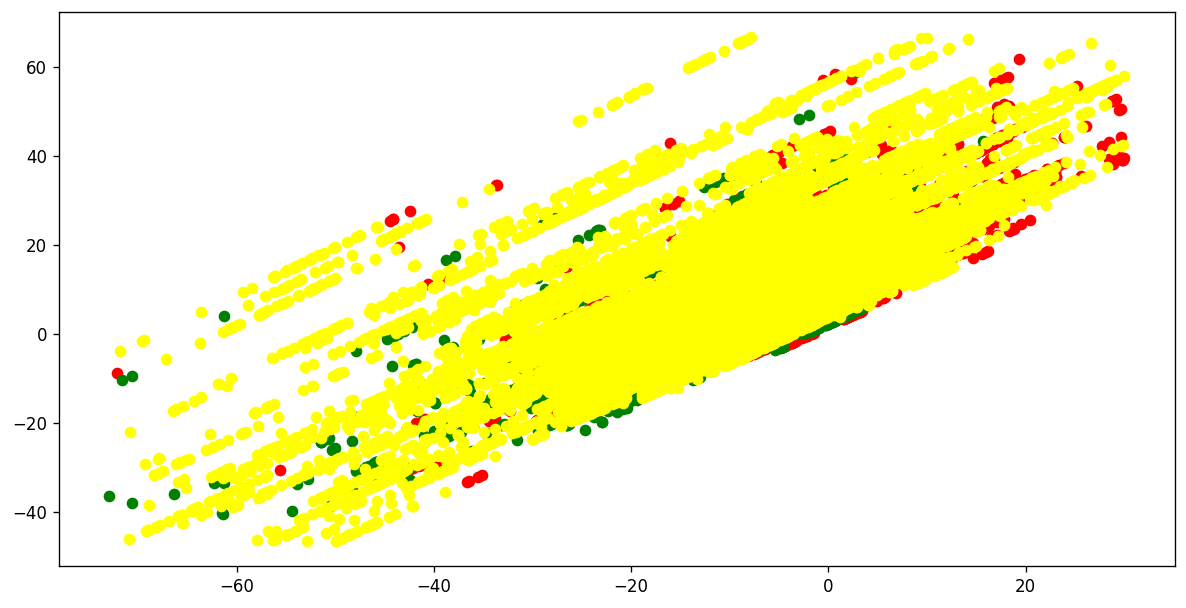

In [24]:
plt.scatter(working_group_high['rate_z'], working_group_high['rate_w'], c='red')
plt.scatter(working_group_low['rate_z'], working_group_low['rate_w'], c='green')
plt.scatter(working_group_none['rate_z'], working_group_none['rate_w'], c='yellow')

<Axes: xlabel='rate_z', ylabel='rate_w'>

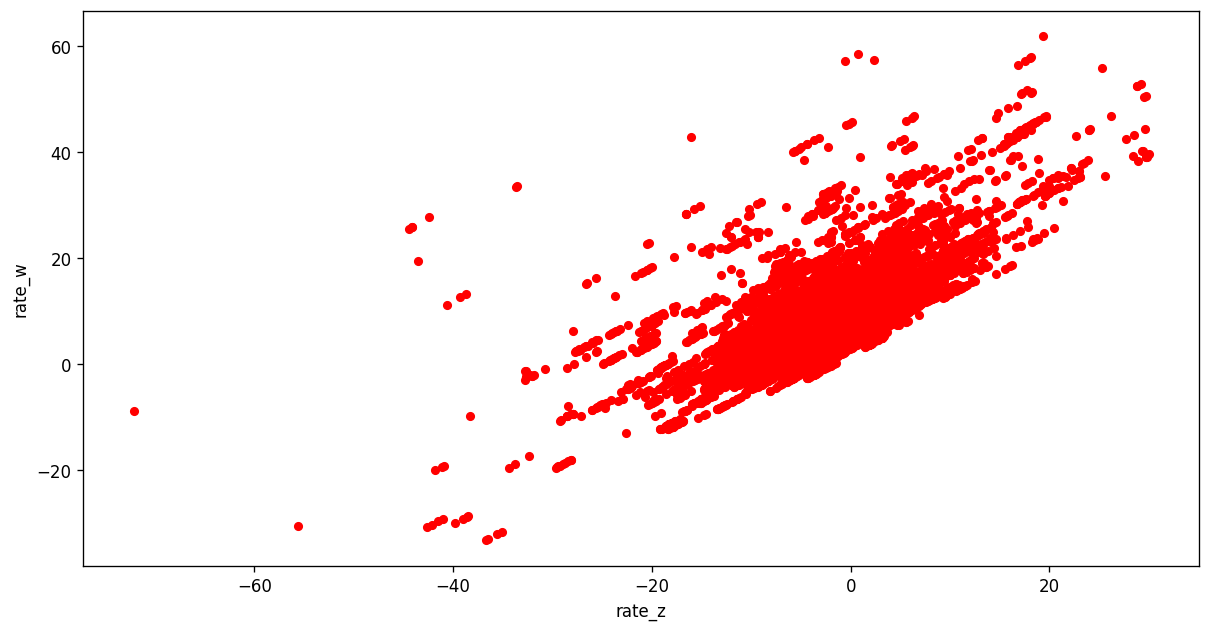

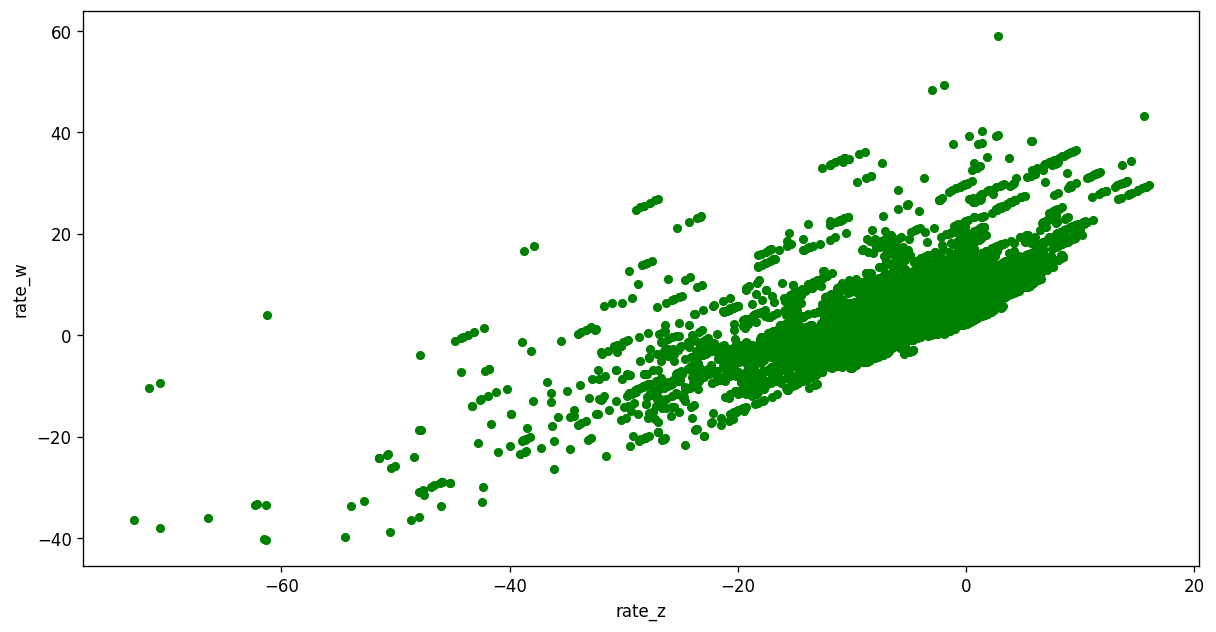

In [25]:
working_group_high.plot.scatter(x='rate_z', y='rate_w', c='red')
working_group_low.plot.scatter(x='rate_z', y='rate_w', c='green')

In [26]:
#rate_z < -15 => long
#rate_z > 10 => short